In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#Import csv file
feedback_sheet = pd.read_csv(r"C:\Users\abc\Desktop\feedback\feedback.csv")

In [22]:


#print csv file
#feedback_sheet

# Total response count
total_response = len(feedback_sheet.index)

#total_response

#---------------**------------------


# Communication skill chunk

communication_to_match = "Communication Skill"
chunk_communication = feedback_sheet.filter(like=communication_to_match)

#chunk_communication qualitative data convert quantitative data

a = chunk_communication.replace("5 (Very effective)",5)
b = a.replace("4 (Effective)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Ineffective)",2)
e = d.replace("1 (Netural)",1)

# store variable
communication_data = e

# row and column exchange - > (Transpose)
communication_res = communication_data.transpose()

communication_sum = communication_res.sum(axis=1)



#communication_sum

#feedback_sheet
#chunk_communication
#communication_data
#communication_res


#------------------**----------------------




# Quality of lecture

quality_to_match = "Quality of lecture"
chunk_quality = feedback_sheet.filter(like=quality_to_match)

#chunk_communication qualitative data convert quantitative data

a = chunk_quality.replace("5 (Very Good)",5)
b = a.replace("4 (Good)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Ineffective)",2)
e = d.replace("1 (Netural)",1)

# store variable
quality_clean_data = e

# row and column exchange - > (Transpose)
quality_transpose = quality_clean_data.transpose()

quality_sum = quality_transpose.sum(axis=1)

#quality_sum



#----------------------**----------------



# Competency in Subject

competency_to_match = "Competency in Subject"
chunk_compentency = feedback_sheet.filter(like=competency_to_match)

#chunk_compentency qualitative data convert quantitative data


#chunk_compentency

a = chunk_compentency.replace("5 (Very Competent)",5)
b = a.replace("4 (Competent)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Ineffective)",2)
e = d.replace("1 (Netural)",1)



# store variable
compentency_clean_data = e

# row and column exchange - > (Transpose)
compentency_transpose = compentency_clean_data.transpose()

compentency_sum = compentency_transpose.sum(axis=1)

#compentency_sum


#---------------------**-------------------------



# Usefulness of Topic/s

usefulness_to_match = "Usefulness of Topic/s"
chunk_usefulness = feedback_sheet.filter(like=usefulness_to_match)

#chunk_Usefulness of Topic/s qualitative data convert quantitative data


a = chunk_usefulness.replace("5 (Very Useful)",5)
b = a.replace("4 (Useful)",4)
c = b.replace("3 (Satisfactory)",3)
d = c.replace("2 (Not Useful)",2)
e = d.replace("1 (Netural)",1)



# store variable
usefulness_clean_data = e

# row and column exchange - > (Transpose)
usefulness_transpose = usefulness_clean_data.transpose()

usefulness_sum = usefulness_transpose.sum(axis=1)

type(usefulness_sum)

#usefulness_sum



#--------------------**-----------------------



#feedback_sheet

type(usefulness_sum)
chunk_compentency
chunk_communication

mylist = []
for i in chunk_communication:
    mylist.append(i)

df = pd.Series(mylist)

faculty_data = pd.DataFrame({"Faculty_text":df})

faculty_data.head()

# #faculty.Faculty_text.str.extract(r'\[(.*?)\(')
faculty = faculty_data.Faculty_text.str.extract(r"\[(.*?)\(")  

faculty_name = []
for i in faculty[0]:
    faculty_name.append(i)

faculty_name[10] = "Dr Pradeep MishraOER"



#-------------------------**-----------------------


#list convert

communication_list = communication_sum.values.tolist()
quality_list = quality_sum.values.tolist()
competency_list = compentency_sum.values.tolist()
usefulness_list = usefulness_sum.values.tolist()
#faculty_name




#DataFrame convert in 4 column  1.Communication	2.Quality	3.Competency	4.Usefulness 

feedback_dataframe = pd.DataFrame({"faculty_name":faculty_name,"Communication":communication_list,"Quality":quality_list,"Competency":competency_list,"Usefulness":usefulness_list})

#feedback_dataframe


#------------------------**--------------------------




# total sum in 1.Communication	2.Quality	3.Competency	4.Usefulness  column 
feedback_total_all = feedback_dataframe.set_index("faculty_name")[['Communication', 'Quality', 'Competency', 'Usefulness']].sum(axis=1)


# calculate average rating  
feedback = feedback_dataframe.set_index("faculty_name")[['Communication', 'Quality', 'Competency', 'Usefulness']].sum(axis=1)/total_response/4
feedback = round(feedback, 2)



#--------------------**------------------------------




# feedback_total_all and feedback average rating and faculy name all column show and excel file export
 
total_all = []
for i in feedback_total_all:
    total_all.append(i)
#print(total_all)

# average rating variable store
feedback_rating = feedback

#feedback_rating

total_rating = []
for i in feedback_rating:
    total_rating.append(i)
#print(total_rating)

fac_tot_rat = total_rating

total_score = pd.DataFrame({"feedback_total":total_all,"total_rating":total_rating})


#feedback_dataframe
#total_score

#total_rating

feedback_final_score = pd.concat([feedback_dataframe, total_score], axis=1)

#Feedback final excel file export
#feedback_final_score.to_excel("feedback_final_score.xlsx")



#feedback_final_score




#---------------------------**-------------------------





C:\Users\abc\AppData\Local\Temp\ipykernel_10752\2795260274.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = c.replace("2 (Ineffective)",2)
C:\Users\abc\AppData\Local\Temp\ipykernel_10752\2795260274.py:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b = a.replace("4 (Good)",4)
C:\Users\abc\AppData\Local\Temp\ipykernel_10752\2795260274.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

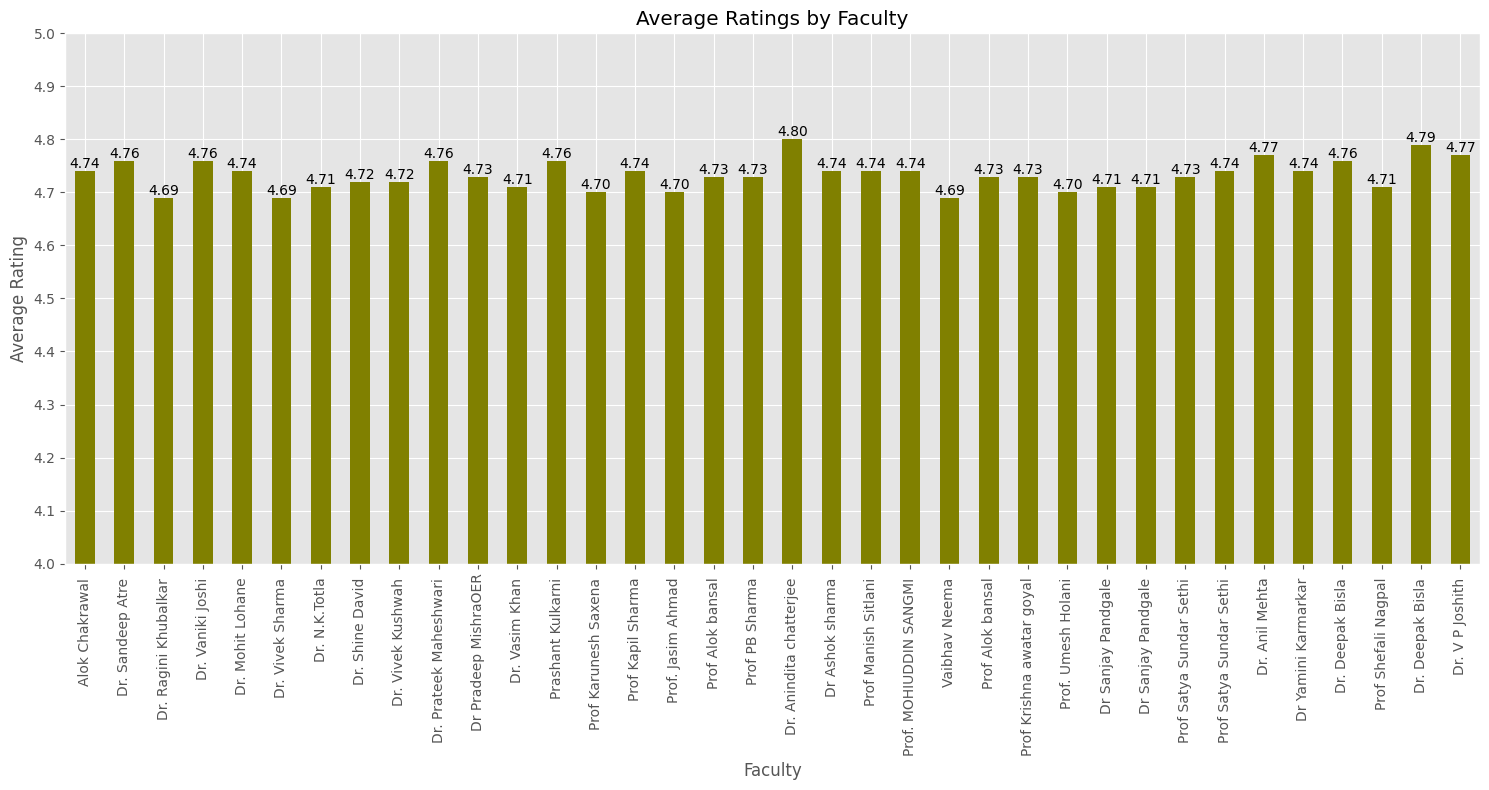

In [49]:
# Faculty Rating final bar graph show


plt.figure(figsize=(15, 8))
bars = feedback.plot(kind='bar', color ='olive')
plt.title('Average Ratings by Faculty')
plt.xlabel('Faculty')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.yticks([1, 2, 3, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0])

# Set the lower limit of the y-axis to 4
plt.ylim(4, 5)



# Adding data labels
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', va='center',
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()


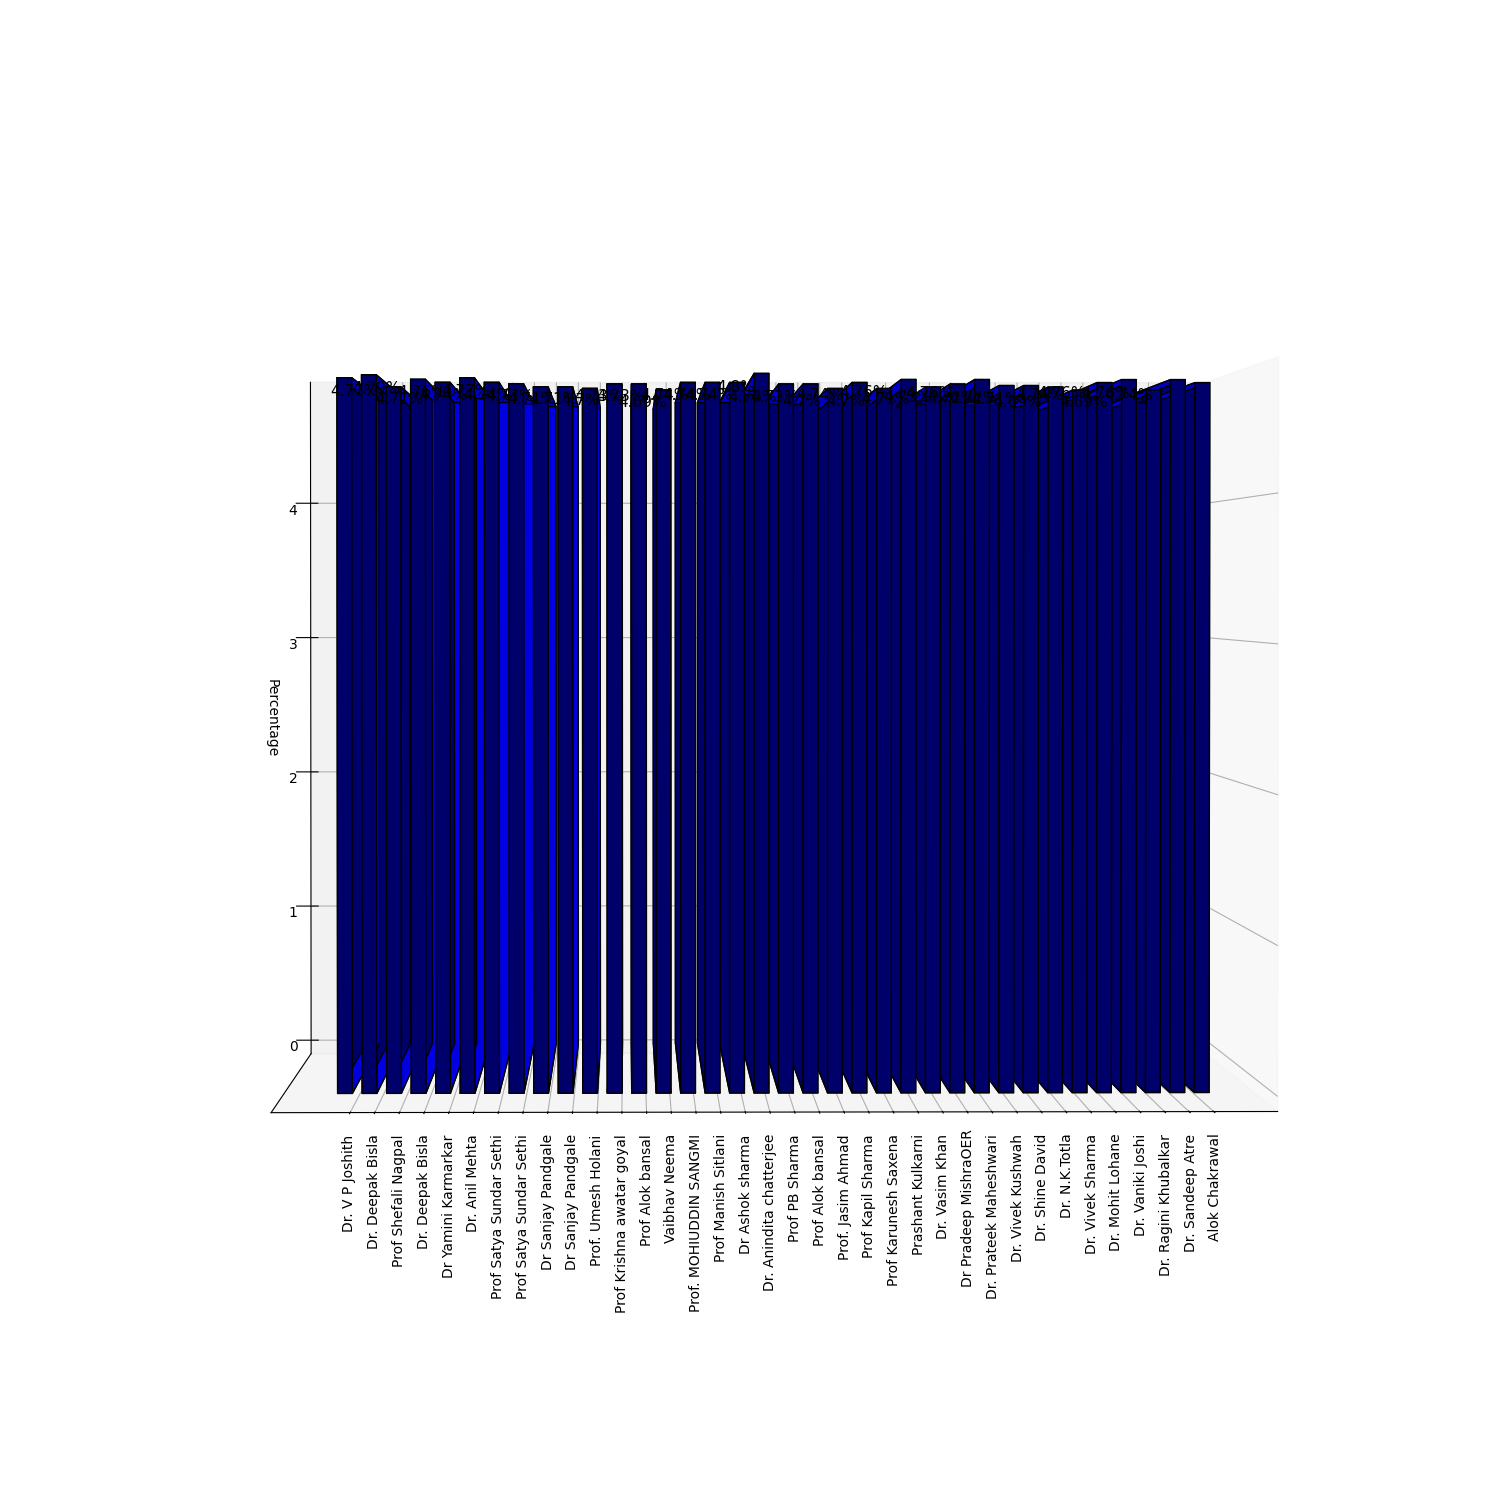

In [31]:
import numpy as np

# Prepare data for 3D bar graph
categories = faculty_name
values = fac_tot_rat

fig = plt.figure(figsize=(19, 35))
#fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(111, projection='3d')

# Position of bars on x-axis
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))  # y positions are all zero for a 2D bar graph
zpos = np.zeros(len(categories))

# The width and depth of the bars
dx = np.ones(len(categories)) * 0.6  # Width of the bars
dy = np.ones(len(categories))  # Depth of the bars
dz = values

# Plot bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='blue', edgecolor='black')

# Labeling the x-axis
ax.set_xticks(xpos)
ax.set_xticklabels(categories)

# Labeling axes
#ax.set_xlabel('Category')
#ax.set_ylabel('Y')
ax.set_zlabel('Percentage')


# Rotate x-axis labels
for label in ax.get_xticklabels():
    label.set_rotation(90)



#Title set
#ax.set_title("12. How would you rate the overall programme ", fontsize= 15)

#ax.set_zlim([4, 5])

# Remove y-ticks
ax.set_yticks([])
#ax.set_zticks([4.0, 4.2, 4.4, 4.6, 4.8, 4.10])




ax.set 
# Set the viewing angle to 89 degrees
ax.view_init(elev=1, azim=89)

# Add value labels on top of bars
for i in range(len(categories)):
    ax.text(xpos[i], ypos[i], dz[i], f'{dz[i]}%', ha='right', va='bottom', fontsize=11, )

# Set figure width
#fig.set_figwidth(25)
#plt.figure().set_figwidth(25)
#plt.figure().set_figheight(40)


# Show the graph
plt.show()